## Aula 1 | Primeiros passos em Python

Hoje vamos:

- Revisar alguns conceitos iniciais
- Explorar dados reais usando Python
- Aprender os primeiros comandos com Pandas e Matplotlib
- Criar gráficos para responder perguntas

## 🎧 Explorando dados do Spotify
Aqui, vamos explorar dados extraídos da conta de um usuário do Spotify para entender um pouco do seu perfil e gosto musical. Trabalharemos com dois datasets:

playlists_tracks: contém a listagem de todas as suas playlists públicas e as músicas contidas nelas
genres_artists: contém a listagem de artistas presentes nas playlists e seus gêneros

### 1. Leitura e visão geral dos dados

In [1344]:
import pandas as pd

playlists_tracks = pd.read_csv('./playlists_tracks')
genres_artists = pd.read_csv('./genres_artists')

In [1345]:
# Verificar quantidade de Linhas e Colunas do df

playlists_tracks.shape

(8661, 10)

In [1346]:
genres_artists.shape

(934, 3)

Nessa primeira análise, podemos notar que o df `playlists_tracks` é o que possui maior quantidade de dados, tanto em número de linhas quanto em número de colunas.

In [1347]:
# Conteúdo do df

playlists_tracks.head()

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866


In [1348]:
genres_artists.head()

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal"
1,1,System Of A Down,"nu metal, metal, alternative metal, rap metal,..."
2,2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock"
3,3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk"
4,4,The Hives,garage rock


In [1349]:
# Resumo do df, tipo de dados, sem há nulos

playlists_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8661 non-null   int64 
 1   playlist_id         8661 non-null   object
 2   playlist_name       8661 non-null   object
 3   track_id            8661 non-null   object
 4   track_name          8659 non-null   object
 5   artist_names        8659 non-null   object
 6   album_name          8659 non-null   object
 7   album_release_date  8661 non-null   object
 8   popularity          8661 non-null   int64 
 9   duration_ms         8661 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 676.8+ KB


In [1350]:
genres_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   934 non-null    int64 
 1   artist_name  934 non-null    object
 2   genres       660 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.0+ KB


Aqui já percebemos que há colunas com dados faltantes: track_name ,  artist_names ,  album_name , genres. \
Vamos precisar tratar isso

In [1351]:
# Quantidade de música por Playlist

playlists_tracks['playlist_name'].value_counts().to_frame()

,count
playlist_name,
Caminhando sem padrão nenhum,311
Rockzim pra cantar junto,300
cantando feat. rebolando,274
tudo misturado curtindo uma chuva,261
Radio em '00,241
...,...
indie mtv 6h em 2008,18
Nunca canso de ouvir,16
Instrumental,16


### 2. Limpeza e Transformações

Antes de analisarmos as playlists e os gêneros, vamos preparar nossos dados:

- Extrair apenas o **ano** da data de lançamento dos álbuns
- Remover músicas com **nome ausente**
- Transformar a tabela de gêneros para que cada **gênero tenha uma linha própria**

### 2.1 Extrair o ano

In [1352]:
# Criar uma nova coluna e converter para data

playlists_tracks['album_release_date_ajustado'] = pd.to_datetime(playlists_tracks['album_release_date'], errors="coerce")

| cód | explicação |
| - | - |
| `pd.to_datetime(...)` | Pega a data que está em formato de texto e a converte para o formato especial de data e hora (datetime64[ns]). |
| `errors="coerce"` | Se o Pandas encontrar alguma data no formato de texto que ele não consegue entender (ex: "Data Inválida"), em vez de travar, ele substitui esse valor por NaT (Not a Time), que é o equivalente de NaN para datas |


In [1353]:
# Conferir se a nova coluna foi criada

playlists_tracks.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_release_date_ajustado'],
      dtype='object')

In [1354]:
# Extrair o ano dessa coluna criada

playlists_tracks['album_release_year'] = playlists_tracks['album_release_date_ajustado'].dt.year

playlists_tracks.head()

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_release_date_ajustado,album_release_year
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01,1992.0
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240,NaT,NaN
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560,NaT,NaN
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906,NaT,NaN
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866,NaT,NaN


In [1355]:
playlists_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   8661 non-null   int64         
 1   playlist_id                  8661 non-null   object        
 2   playlist_name                8661 non-null   object        
 3   track_id                     8661 non-null   object        
 4   track_name                   8659 non-null   object        
 5   artist_names                 8659 non-null   object        
 6   album_name                   8659 non-null   object        
 7   album_release_date           8661 non-null   object        
 8   popularity                   8661 non-null   int64         
 9   duration_ms                  8661 non-null   int64         
 10  album_release_date_ajustado  629 non-null    datetime64[ns]
 11  album_release_year           629 non-null  

⚠️ Aqui percebemos uma grande quantidade de valores nulos na coluna criada `album_release_year `. O que aconteceu é que coluna `album_release_date` possui datas em formatos diferentes, alguns são apenas o ano (“1992”), e outros estão em formato completo “YYYY-MM-DD”. \
O problema é que a função `pd.to_datetime()` tem dificuldade em lidar com formatos misturados ao tentar adivinhar qual o padrão

✅ Para resolver isso podemos criar uma função pra ajustar o dado
- Se o valor tiver só 4 caracteres numéricos (ex: "1992"), ele vira "1992-01-01";
- Se for algo como "2001-09-04", o código mantém;
- Depois, o to_datetime() converte tudo para o formato de data, sem NaT (exceto se o valor for realmente inválido).

In [1356]:
def ajustar_data(x):
    x = str(x)
    # Se for só o ano, adiciona "-01-01"
    if len(x) == 4 and x.isdigit():
        return f"{x}-01-01"
    # Caso contrário, mantém o valor original
    return x

# Aplica a função
playlists_tracks['album_release_date_ajustado'] = playlists_tracks['album_release_date'].apply(ajustar_data)

# Converte para datetime
playlists_tracks['album_release_date_ajustado'] = pd.to_datetime(
    playlists_tracks['album_release_date_ajustado'], errors='coerce'
)


In [1357]:
# Extrair o ano dessa coluna criada

playlists_tracks['album_release_year'] = playlists_tracks['album_release_date_ajustado'].dt.year

playlists_tracks.head()

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_release_date_ajustado,album_release_year
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01,1992.0
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240,2001-09-04,2001.0
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560,2021-09-10,2021.0
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906,2005-11-22,2005.0
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866,1987-06-15,1987.0


In [1358]:
playlists_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   8661 non-null   int64         
 1   playlist_id                  8661 non-null   object        
 2   playlist_name                8661 non-null   object        
 3   track_id                     8661 non-null   object        
 4   track_name                   8659 non-null   object        
 5   artist_names                 8659 non-null   object        
 6   album_name                   8659 non-null   object        
 7   album_release_date           8661 non-null   object        
 8   popularity                   8661 non-null   int64         
 9   duration_ms                  8661 non-null   int64         
 10  album_release_date_ajustado  8650 non-null   datetime64[ns]
 11  album_release_year           8650 non-null 

In [1359]:
playlists_tracks.head()

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_release_date_ajustado,album_release_year
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01,1992.0
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240,2001-09-04,2001.0
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560,2021-09-10,2021.0
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906,2005-11-22,2005.0
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866,1987-06-15,1987.0


### 2.2 Excluir linhas com track_name ausente

In [1360]:
playlists_tracks_clean = playlists_tracks.dropna(subset = ['track_name'])
playlists_tracks_clean.shape # antes tinha 8661 linhas, ou seja, removemos 2 linhas com track_name ausente

(8659, 12)

### 2.3 Explodir os gêneros (1 por artista e gênero)

### 3. Visualização com Matplotlib
Agora que os dados estão limpos, vamos responder algumas perguntas com gráficos.

In [1361]:
import matplotlib.pyplot as plt

### Quais playlists têm mais músicas?

In [1362]:
# As 10 playlists com mais músicas

playlist_count = playlists_tracks_clean['playlist_name'].value_counts().head(10)
playlist_count

playlist_name
Caminhando sem padrão nenhum         311
Rockzim pra cantar junto             300
cantando feat. rebolando             274
tudo misturado curtindo uma chuva    261
Radio em '00                         241
VOLTA JUVENTUDE                      239
Black power                          231
jovem indie                          219
Top indie                            215
Só ~good vibe~                       210
Name: count, dtype: int64

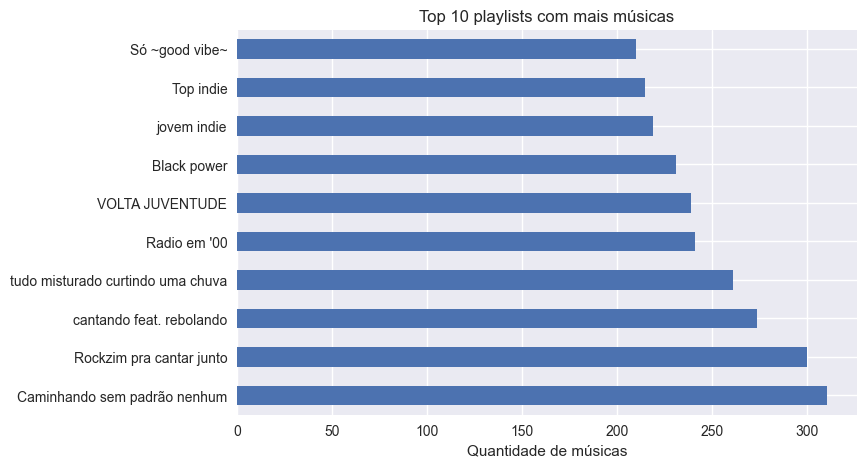

In [1363]:
playlist_count.plot(kind = 'barh', figsize=(8,5))

plt.title('Top 10 playlists com mais músicas')
plt.xlabel('Quantidade de músicas')
plt.ylabel("")

plt.show()

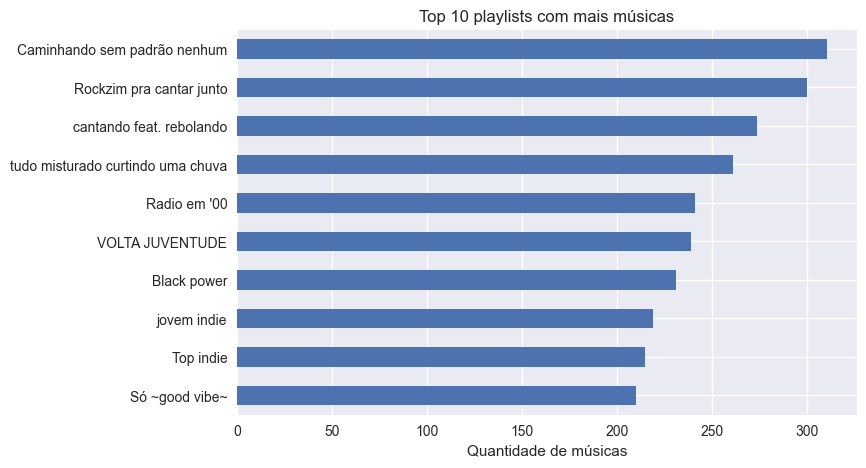

In [1364]:
# 1. Inverte a ordem do DataFrame (pega do último item ao primeiro)
playlist_count_invertido = playlist_count.iloc[::-1]

# 2. Plota o DataFrame invertido
playlist_count_invertido.plot(kind = 'barh', figsize=(8,5))

plt.title('Top 10 playlists com mais músicas')
plt.xlabel('Quantidade de músicas')
plt.ylabel('')
plt.show()

### Como evolui a quantidade de músicas lançadas por ano nas playlists?

In [1365]:
plt.style.use('seaborn-v0_8')

In [1366]:
songs_per_year = (
    playlists_tracks_clean['album_release_year']
    .value_counts()
    .sort_index()
)
songs_per_year

album_release_year
1957.0      5
1958.0      1
1960.0      4
1961.0      1
1963.0      9
         ... 
2021.0    359
2022.0    168
2023.0    110
2024.0     51
2025.0     46
Name: count, Length: 67, dtype: int64

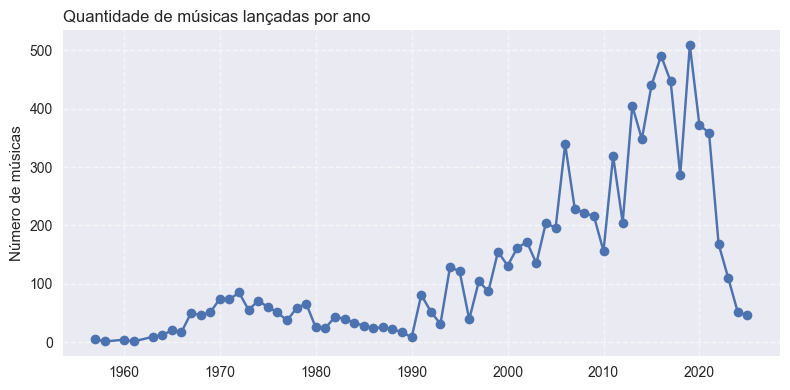

In [1367]:
songs_per_year.plot(kind='line', marker="o", figsize=(8,4))

plt.title('Quantidade de músicas lançadas por ano', loc=('left'))
plt.xlabel('')
plt.ylabel('Número de músicas')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

### Quais são os artistas com maior popularidade média?

### Quais são os artistas mais frequentes nas playlists?

### Quais gêneros são mais frequentes entre os artistas das playlists?

### Qual é a duração média das músicas por playlist?

### Exercício: Existe relação entre o ano de lançamento e a duração média das músicas?

### Exercício: Quão diversa em gêneros é cada playlist? 
Em outras palavras, quais playlists têm mais gêneros distintos entre os artistas que aparecem nelas?